In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

In [2]:
import numpy as np
import pandas as pd
import datetime

In [3]:
import datetime

# Step 1 - Climate Analysis and Exploration

In [4]:
# sqlite3
import sqlite3

In [5]:
#create connection with hawaii database
conn = sqlite3.connect("Resources/hawaii.sqlite")

In [6]:
#obtain a cursor - something to loop through via database connection
cur = conn.cursor()

In [7]:
# sqlite3


In [8]:
#obtain data from cursor via loop - in this case - table names in database file
# execute statement via cursor-find table names
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
# fetch the cursor above
rows = cur.fetchall()
 
for row in rows:
    print(row)

('measurement',)
('station',)


In [10]:
#obtain details of the schema/table format from table named station
# execute statement via cursor
cur.execute("SELECT sql FROM sqlite_master WHERE name='station'")
# fetch the cursor above
rows = cur.fetchall()
for row in rows:
    print(row)

('CREATE TABLE station (\n\tid INTEGER NOT NULL, \n\tstation TEXT, \n\tname TEXT, \n\tlatitude FLOAT, \n\tlongitude FLOAT, \n\televation FLOAT, \n\tPRIMARY KEY (id)\n)',)


In [11]:
# execute statement via cursor-print rows of table named station
sqlstate = "select * from station"
cur.execute(sqlstate )
# fetch the cursor above
rows = cur.fetchall()
#create list to save each column
id_ls = []
station_ls = []
name_ls = []
latitude_ls = []
longitude_ls = []
elevation_ls = []
#print all results
for row in rows:
    id_ls.append(row[0])
    station_ls.append(row[1])
    name_ls.append(row[2])
    latitude_ls.append(row[3])
    longitude_ls.append(row[4])
    elevation_ls.append(row[5])

stationdata = dict()
stationdata['id'] =id_ls
stationdata['station'] =station_ls
stationdata['name'] =name_ls
stationdata['latitude'] =latitude_ls
stationdata['longitude'] =longitude_ls
stationdata['elevation'] =elevation_ls
station_df = pd.DataFrame(stationdata)
station_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [12]:
#obtain details of the schema/table format from table named measurement
# execute statement via cursor
cur.execute("SELECT sql FROM sqlite_master WHERE name='measurement'")
# fetch the cursor above
rows = cur.fetchall()
for row in rows:
    print(row)


('CREATE TABLE measurement (\n\tid INTEGER NOT NULL, \n\tstation TEXT, \n\tdate TEXT, \n\tprcp FLOAT, \n\ttobs FLOAT, \n\tPRIMARY KEY (id)\n)',)


#### Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

In [13]:
# execute statement via cursor-print rows of table named measurement

# sqlstate = "select * from measurement"
sqlstate = "select * from measurement where date between '2017-07-01' and '2017-07-10' "
cur.execute(sqlstate )
# fetch the cursor above
rows = cur.fetchall()
#create list to save each column
id_ls = []
station_ls = []
date_ls = []
prcp_ls = []
tobs_ls = []
    
# print all results
for row in rows:
#     print(row)
    id_ls.append(row[0])
    station_ls.append(row[1])
    date_ls.append(row[2])
    prcp_ls.append(row[3])
    tobs_ls.append(row[4])

msrdata = dict()
msrdata['id']=id_ls
msrdata['station']=station_ls
msrdata['date']=date_ls
msrdata['prcp']=prcp_ls
msrdata['tobs']=tobs_ls
msr_df = pd.DataFrame(msrdata)
msr_df.head()


,id,station,date,prcp,tobs
0,2674,USC00519397,2017-07-01,0.02,80.0
1,2675,USC00519397,2017-07-02,0.02,80.0
2,2676,USC00519397,2017-07-03,0.04,78.0
3,2677,USC00519397,2017-07-04,0.04,80.0
4,2678,USC00519397,2017-07-05,0.00,80.0


# Precipitation Analysis

In [14]:
# execute statement via cursor-print rows of table named measurement
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# find the last date

sqlstate = "select date from measurement order by date desc limit 1"
cur.execute(sqlstate )
# fetch the cursor above
rows = cur.fetchall()
for row in rows:
    last_date_str = row[0]
    last_date_dt = datetime.date(*(int(s) for s in last_date_str.split('-')))
    first_date_dt = last_date_dt - datetime.timedelta(days=365)
    first_date_str = str(first_date_dt)
print(last_date_str)
print(first_date_str)

2017-08-23
2016-08-23


In [15]:
# execute statement via cursor-print rows of table named measurement
sqlstate = "select date,prcp from measurement where date between '"+first_date_str+"' and '"+last_date_str+"' order by date"

cur.execute(sqlstate )
# fetch the cursor above
rows = cur.fetchall()
#create list to save each column
date_ls = []
prcp_ls = []
    
# print all results
for row in rows:
    date_ls.append(row[0])
    prcp_ls.append(row[1])


msrdata_12month = dict()

msrdata_12month['date']=date_ls
msrdata_12month['prcp']=prcp_ls

msr_12month_df = pd.DataFrame(msrdata_12month)

# msr_12month_df = msr_12month_df.groupby(["date"]).sum()

In [16]:
msr_12month_df.dropna(subset=['prcp'], inplace=True)
msr_12month_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79


In [17]:
len(msr_12month_df)

2021

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
msr_12month_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


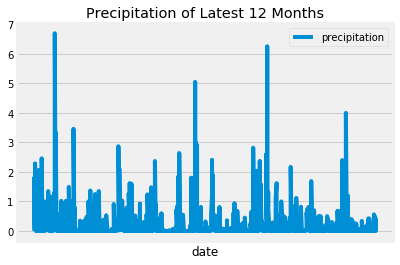

In [19]:
plt.plot(msr_12month_df.date, msr_12month_df.prcp, label="precipitation")
# remove ticks
tick_locations = []
plt.xticks(tick_locations)
plt.title("Precipitation of Latest 12 Months")
plt.xlabel("date")
plt.legend(loc="upper right")

# Station Analysis

##### Design a query to show how many stations are available in this dataset?

In [20]:
# execute statement via cursor-print rows of table named station
sqlstate = "select count(*) from station"
cur.execute(sqlstate )
# fetch the cursor above
rows = cur.fetchall()
for row in rows:
    number_ls = rows[0]
number_station = number_ls[0]
print(number_station)


9


### What are the most active stations? (i.e. what stations have the most rows)?
##### List the stations and the counts in descending order.

In [21]:
# execute statement via cursor-print rows of table named measurement
sqlstate= "select * from measurement"
cur.execute(sqlstate)
# fetch the cursor above
rows = cur.fetchall()
#create list to save each column
id_total_ls = []
station_total_ls = []
date_total_ls = []
prcp_total_ls = []
tobs_total_ls = []
    
# print all results
for row in rows:
#     print(row)
    id_total_ls.append(row[0])
    station_total_ls.append(row[1])
    date_total_ls.append(row[2])
    prcp_total_ls.append(row[3])
    tobs_total_ls.append(row[4])

msrdata_total = dict()
msrdata_total['id']=id_total_ls
msrdata_total['station']=station_total_ls
msrdata_total['date']=date_total_ls
msrdata_total['prcp']=prcp_total_ls
msrdata_total['tobs']=tobs_total_ls
msr_total_df = pd.DataFrame(msrdata_total)
msr_total_df.head()


,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [22]:
station_observation_df = pd.DataFrame(msr_total_df['station'].value_counts()).rename(columns = {"station":"Number of Observation"})
station_observation_df = station_observation_df.sort_values(by=["Number of Observation"],ascending=False)
station_observation_df

,Number of Observation
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


### Using the station id from the previous query, calculate the lowest temperature recorded, 
##### highest temperature recorded, and average temperature most active station?


In [23]:
# execute statement via cursor-print rows of table named measurement
sqlstate= "select min(tobs),max(tobs),avg(tobs) from measurement"
cur.execute(sqlstate)
# fetch the cursor above
rows = cur.fetchall()
#create list to save each column
for row in rows:
    print(row)

(53.0, 87.0, 73.09795396419437)


##### Choose the station with the highest number of temperature observations.
##### Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [24]:
# define the most active station name
active_station = station_observation_df.index[0]

# execute statement via cursor-print rows of table named measurement
sqlstate = "select tobs from measurement where date between '"+first_date_str+"' and '"+last_date_str+"' and station= '"+active_station+"'"

cur.execute(sqlstate )
# fetch the cursor above
rows = cur.fetchall()

#create list to save each column
tobs_ls = []
    
# print all results
for row in rows:
    tobs_ls.append(row[0])

active_station_list = dict()
active_station_list['tobs']=tobs_ls
active_station_df = pd.DataFrame(active_station_list)

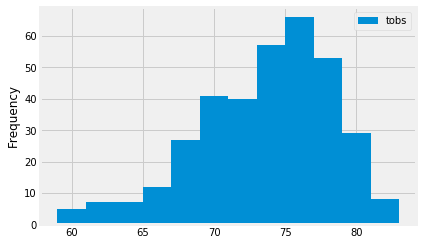

In [25]:
active_station_df.plot.hist(bins=12)

# Step 2 - Climate App

### Check the Climate App in the python file.

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    import sqlite3
    #create connection with hawaii database
    conn = sqlite3.connect("Resources/hawaii.sqlite")
    #obtain a cursor - something to loop through via database connection
    cur = conn.cursor()
#     start_date ='2012-02-28'
#     end_date='2012-03-05'
    # execute statement via cursor-print rows of table named measurement
    sqlstate = "select * from measurement where date between '"+start_date+"' and '"+end_date+"' order by date"

    cur.execute(sqlstate )
    # fetch the cursor above
    rows = cur.fetchall()
    #create list to save each column
    id_ls = []
    station_ls = []
    date_ls = []
    prcp_ls = []
    tobs_ls = []

    # print all results
    for row in rows:
    #     print(row)
        id_ls.append(row[0])
        station_ls.append(row[1])
        date_ls.append(row[2])
        prcp_ls.append(row[3])
        tobs_ls.append(row[4])

    msrment = dict()
    msrment['id']=id_ls
    msrment['station']=station_ls
    msrment['date']=date_ls
    msrment['prcp']=prcp_ls
    msrment['tobs']=tobs_ls
    msrment_df= pd.DataFrame(msrment)
    
    return (msrment_df["tobs"].min(),  msrment_df["tobs"].mean(), msrment_df["tobs"].max())

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

(62.0, 69.57142857142857, 74.0)


In [27]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2017-07-01', '2017-07-10'))


(69.0, 78.15254237288136, 87.0)


# Optional: Other Recommended Analyses (Skip)